In [8]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
from labellines import *
import pandas as pd


In [9]:
plt.style.use(['science','grid','notebook'])

In [10]:
f_0 = h5py.File("./fs-0/third_order/kappa-m40401.hdf5")
f2  = h5py.File("./fs-2/third_order/kappa-m20201.hdf5")
f4  = h5py.File("./fs-4/third_order/kappa-m40401.hdf5")
f_2 = h5py.File("./fs--2/third_order/kappa-m20201.hdf5")
f_4 = h5py.File("./fs--4/third_order/kappa-m20201.hdf5")

In [11]:
for a in list(f_0):
    print(a,'.'*(25-len(a)),np.array(f_0[a]).shape)

ave_pp ................... (421, 6)
boundary_mfp ............. ()
frequency ................ (421, 6)
gamma .................... (101, 421, 6)
gamma_isotope ............ (421, 6)
grid_point ............... (421,)
group_velocity ........... (421, 6, 3)
gv_by_gv ................. (421, 6, 6)
heat_capacity ............ (101, 421, 6)
kappa .................... (101, 6)
kappa_unit_conversion .... ()
mesh ..................... (3,)
mode_kappa ............... (101, 421, 6, 6)
qpoint ................... (421, 3)
temperature .............. (101,)
version .................. ()
weight ................... (421,)


Text(0.5, 0, 'T')

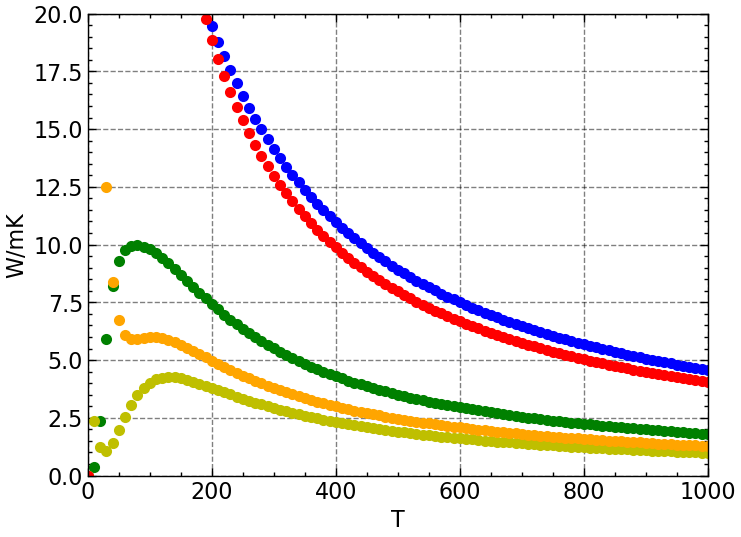

In [12]:

plt.scatter(f_4['temperature'][:],np.array(f_4['kappa'])[:,0]  , lw = 2, c = 'b')
plt.scatter(f_2['temperature'][:],np.array(f_2['kappa'])[:,0]  , lw = 2, c = 'g')
plt.scatter(f_0['temperature'][:],np.array(f_0['kappa'])[:,0]  , lw = 2, c = 'y')
plt.scatter(f2['temperature'][:],np.array(f2['kappa'])[:,0]    , lw = 2, c = 'orange')
plt.scatter(f4['temperature'][:],np.array(f4['kappa'])[:,0]    , lw = 2, c = 'r')

    


plt.xlim(0,1000)
plt.ylim(0,20)
plt.ylabel('W/mK')
plt.xlabel('T')

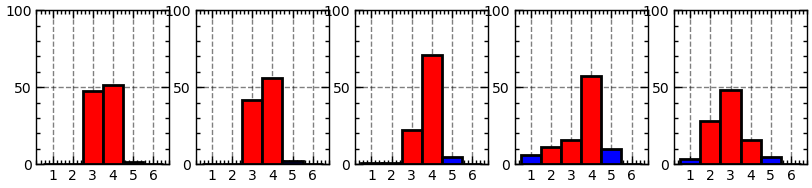

In [13]:
i=1
plt.figure(figsize=(12,2))
for f1 in [f_4, f_2, f_0, f2, f4]:  

    kappa_xx_at_index_30 = f1['mode_kappa'][30, :, :, 0].sum(axis=0)/ f1['weight'][:].sum()
    plt.subplot(1,6,i)
    plt.bar([1,2,3,4,5,6],kappa_xx_at_index_30*100/sum(kappa_xx_at_index_30), 
                        edgecolor='black', lw=2,align='center', width=1, color = ['b','r','r','r','b', 'b'])
    i+=1
    plt.ylim(0,100)
    plt.xticks([1,2,3,4,5,6], fontsize=10)
    plt.yticks(fontsize=10)

In [14]:
df = pd.read_csv('fs-0/third_order/lifetimes.csv')

In [15]:
df.head()

,Unnamed: 0,freq,lifetime
0,0,17.502530,1.480438
1,1,17.511191,2.317618
2,2,0.229684,0.728768
3,3,0.811687,0.067430
4,4,17.496110,1.156250


In [ ]:
plt.plot(df[1])

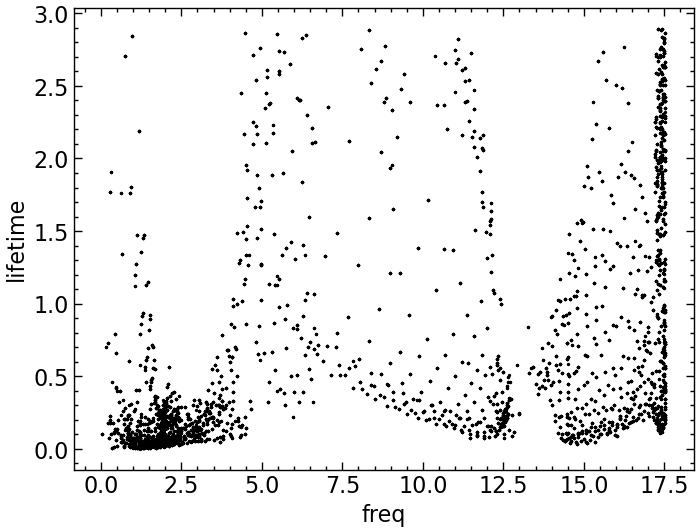

In [28]:
df.plot(kind='scatter',
        x='freq',
        y='lifetime',
        s = 2,
        
        c='black')

plt.grid(False)